In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


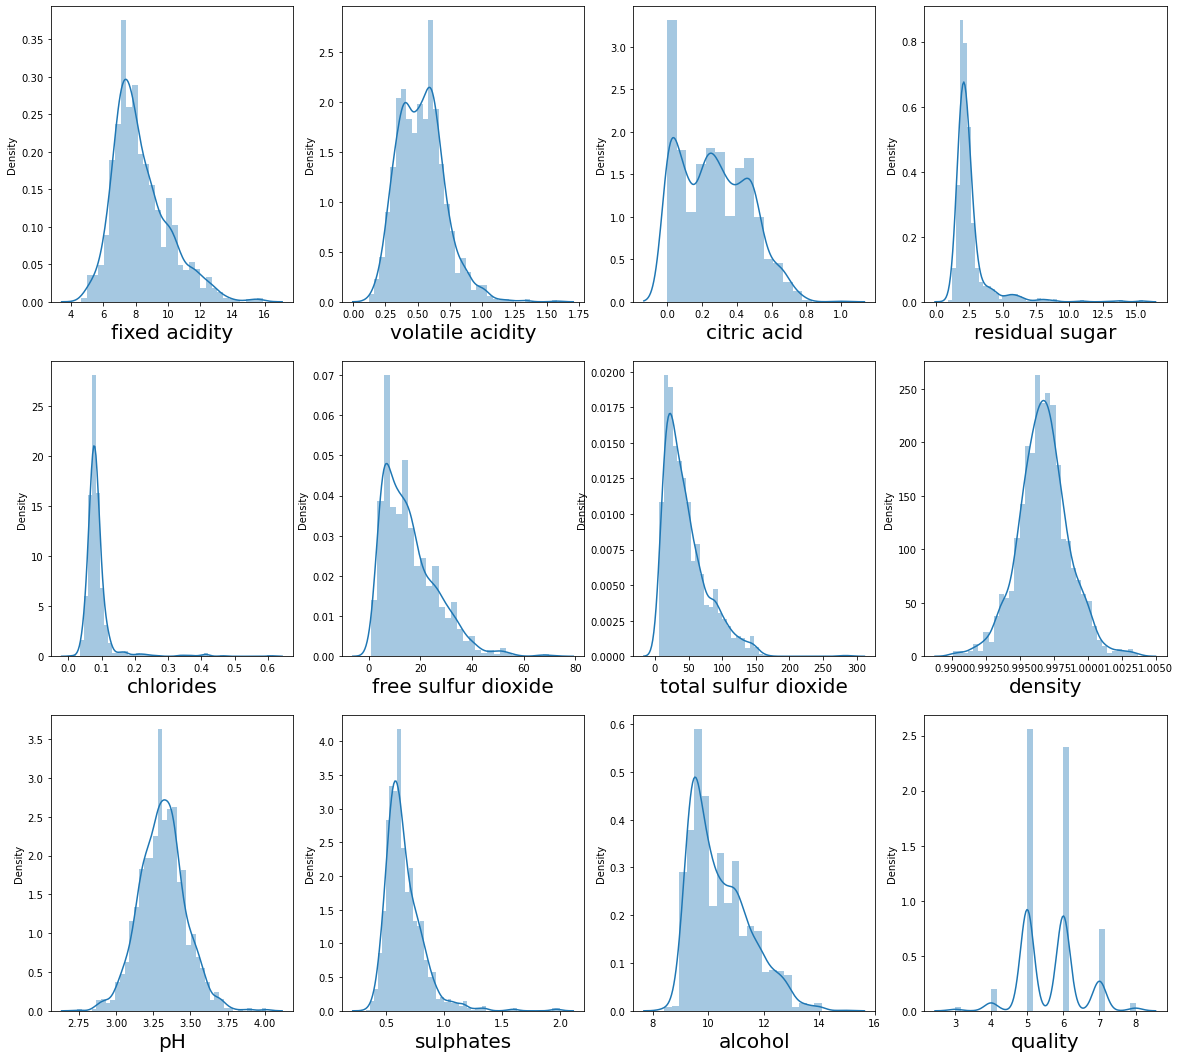

In [6]:
plt.figure(figsize =(20,25))
plotnumber =1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(4,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1

plt.show()

In [7]:
data['volatile acidity']= data['volatile acidity'].replace(0,data['volatile acidity'].mean())

data['citric acid']= data['citric acid'].replace(0,data['citric acid'].mean())
                                                           
data['residual sugar']= data['residual sugar'].replace(0,data['residual sugar'].mean())
                                                       
data['chlorides']= data['chlorides'].replace(0,data['chlorides'].mean())
                                                       
data['free sulfur dioxide']= data['free sulfur dioxide'].replace(0,data['free sulfur dioxide'].mean())
                                                       
data['total sulfur dioxide']= data['total sulfur dioxide'].replace(0,data['total sulfur dioxide'].mean())

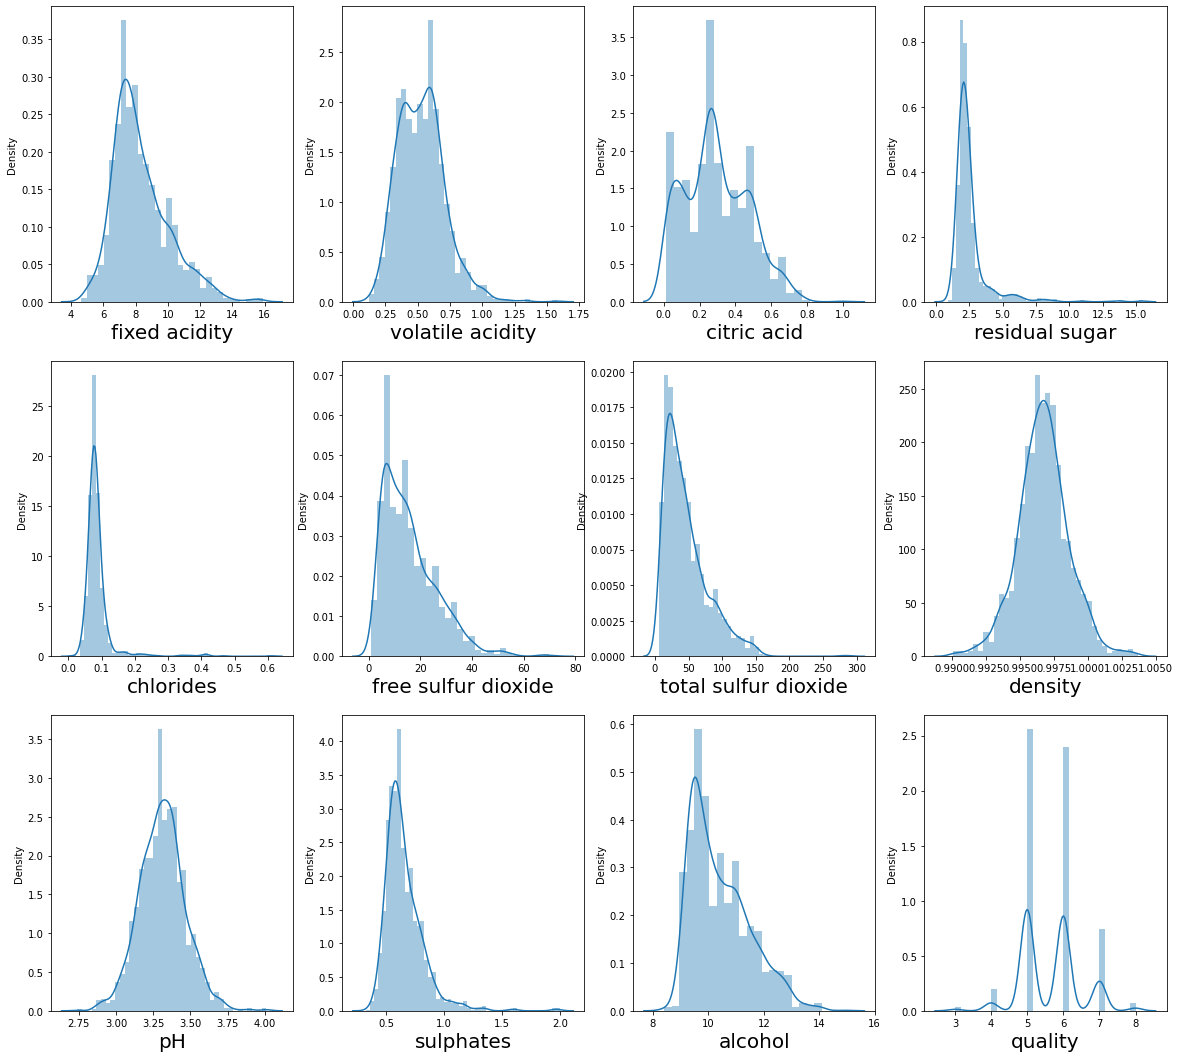

In [8]:
plt.figure(figsize =(20,25))
plotnumber =1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(4,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1

plt.show()

In [9]:
df_features=data.drop('quality', axis=1)

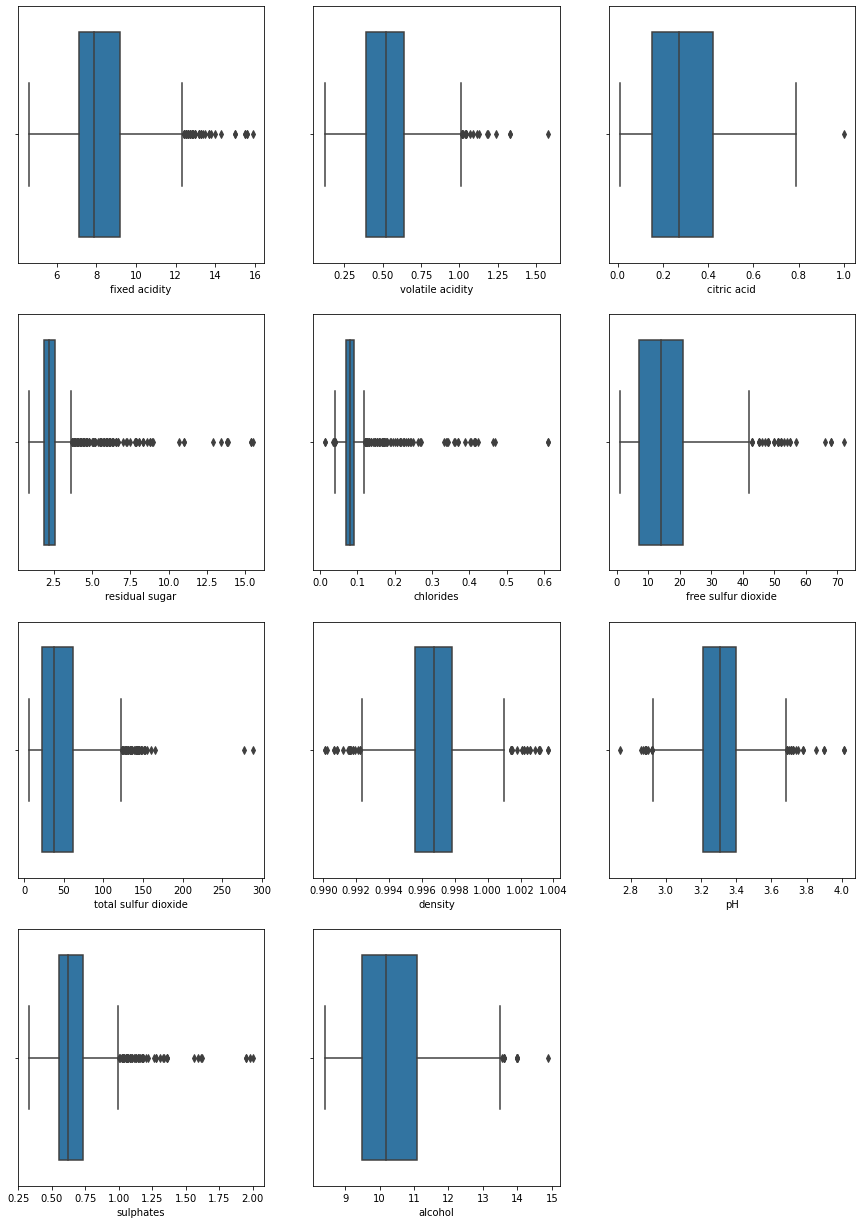

In [10]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if graph<=11:
        ax=plt.subplot(9,3,graph)
        sns.boxplot(df_features[column],orient='h')
        
        plt.xlabel(column,fontsize=10)
        
        graph+=1
        
plt.show()

In [11]:
data.shape

(1599, 12)

In [12]:
q1=data.quantile(0.25)

q3=data.quantile(0.75)

iqr=q3-q1

In [13]:
print(q1)

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.1500
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64


In [14]:
print(q3)

fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64


In [15]:
type(q1)

pandas.core.series.Series

In [16]:
fixed_low = (q1['fixed acidity']- (1.5 * iqr['fixed acidity']))
fixed_low

3.95

In [17]:
index=np.where(data['fixed acidity']<fixed_low)
index

(array([], dtype=int64),)

In [18]:
fixed_high = (q3['fixed acidity']+ (1.5 * iqr['fixed acidity']))
fixed_high

12.349999999999998

In [19]:
index=np.where(data['fixed acidity']>fixed_high)
index

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [20]:
data=data.drop(data.index[index])
print(data.shape)

(1550, 12)


In [21]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
volatile_low = (q1['volatile acidity']- (1.5 * iqr['volatile acidity']))
volatile_low

0.015000000000000013

In [23]:
index=np.where(data['volatile acidity']<volatile_low)
index

(array([], dtype=int64),)

In [24]:
volatile_high = (q3['volatile acidity']+ (1.5 * iqr['volatile acidity']))
volatile_high

1.0150000000000001

In [25]:
index=np.where(data['volatile acidity']>volatile_high)
index

(array([  38,   94,  120,  126,  127,  134,  199,  521,  627,  644,  654,
         659,  664,  678,  851, 1212, 1250, 1263, 1418], dtype=int64),)

In [26]:
data=data.drop(data.index[index])
data.shape

(1531, 12)

In [27]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
citric_low=(q1['citric acid']-(1.5*iqr['citric acid']))
citric_low

-0.255

In [29]:
index=np.where(data['citric acid']<citric_low)
index

(array([], dtype=int64),)

In [30]:
citric_high=(q3['citric acid']+(1.5*iqr['citric acid']))
citric_high

0.825

In [31]:
index=np.where(data['citric acid']>citric_high)
index

(array([145], dtype=int64),)

In [32]:
data=data.drop(data.index[index])
print(data.shape)

(1530, 12)


In [33]:
sug_low=(q1['residual sugar']-(1.5*iqr['residual sugar']))
sug_low

0.8499999999999996

In [34]:
index=np.where(data['residual sugar']<sug_low)
index

(array([], dtype=int64),)

In [35]:
sug_high=(q3['residual sugar']+(1.5*iqr['residual sugar']))
sug_high

3.6500000000000004

In [36]:
index=np.where(data['residual sugar']>sug_high)
index

(array([   9,   11,   14,   15,   18,   33,   35,   38,   39,   54,   56,
          63,   64,  147,  148,  149,  150,  156,  157,  185,  205,  256,
         257,  258,  259,  261,  262,  264,  265,  266,  270,  310,  311,
         313,  351,  354,  368,  369,  373,  381,  385,  387,  423,  446,
         450,  460,  467,  468,  479,  501,  503,  513,  514,  547,  554,
         556,  571,  572,  592,  596,  605,  659,  679,  739,  815,  821,
         826,  839,  840,  846,  847,  849,  853,  859,  877,  880,  882,
         910,  968,  974,  979,  992,  993,  995, 1007, 1010, 1013, 1014,
        1015, 1017, 1022, 1030, 1032, 1050, 1069, 1074, 1083, 1112, 1122,
        1126, 1139, 1161, 1170, 1174, 1179, 1192, 1210, 1222, 1223, 1229,
        1230, 1240, 1263, 1290, 1305, 1320, 1326, 1338, 1344, 1355, 1366,
        1367, 1369, 1373, 1377, 1402, 1405, 1407, 1409, 1432, 1445, 1446,
        1471, 1483, 1489, 1505, 1508, 1520], dtype=int64),)

In [37]:
data=data.drop(data.index[index])
print(data.shape)

(1392, 12)


In [38]:
chlor_high=(q3['chlorides']+(1.5*iqr['chlorides']))
chlor_high

0.11999999999999998

In [39]:
index=np.where(data['chlorides']>chlor_high)
index

(array([  13,   14,   32,   67,   69,   91,   94,  109,  128,  143,  155,
         195,  209,  225,  238,  247,  258,  262,  263,  279,  281,  282,
         286,  311,  348,  373,  377,  404,  405,  428,  431,  458,  465,
         466,  467,  505,  509,  527,  551,  572,  574,  607,  630,  649,
         650,  652,  653,  656,  671,  672,  683,  705,  706,  754,  780,
         817,  872,  878,  879,  906,  941,  952,  986, 1004, 1027, 1029,
        1042, 1055, 1056, 1082, 1087, 1088, 1089, 1139, 1153, 1188, 1189,
        1190, 1191, 1246, 1366], dtype=int64),)

In [40]:
data=data.drop(data.index[index])
data.shape

(1311, 12)

In [41]:
chlor_low=(q1['chlorides']-(1.5*iqr['chlorides']))
chlor_low

0.04000000000000002

In [42]:
index=np.where(data['chlorides']<chlor_low)
index

(array([ 169,  532,  536,  623,  656,  657,  681, 1212, 1286], dtype=int64),)

In [43]:
data=data.drop(data.index[index])
data.shape

(1302, 12)

In [44]:
sul_high=(q3['free sulfur dioxide']+(1.5*iqr['free sulfur dioxide']))
sul_high

42.0

In [45]:
index=np.where(data['free sulfur dioxide']>sul_high)
index

(array([ 387,  404,  447,  485,  522,  725,  726,  777,  858,  904,  923,
         925,  943,  978,  988, 1009], dtype=int64),)

In [46]:
data=data.drop(data.index[index])
data.shape

(1286, 12)

In [47]:
sul_low=(q1['free sulfur dioxide']-(1.5*iqr['free sulfur dioxide']))
sul_low

-14.0

In [48]:
index=np.where(data['free sulfur dioxide']<sul_low)
index

(array([], dtype=int64),)

In [49]:
totalsul_high=(q3['total sulfur dioxide']+(1.5*iqr['total sulfur dioxide']))
totalsul_high

122.0

In [50]:
index=np.where(data['total sulfur dioxide']>totalsul_high)
index

(array([  67,   69,   71,   72,   73,  104,  118,  151,  152,  153,  162,
         176,  248,  277,  322,  360,  403,  451,  483,  484,  495,  522,
         528,  552,  567,  596,  597,  611, 1113, 1114, 1130, 1191, 1194,
        1251, 1252, 1253], dtype=int64),)

In [51]:
den_high=(q3['density']+(1.5*iqr['density']))
den_high

1.0011875

In [52]:
index=np.where(data['density']>den_high)
index

(array([], dtype=int64),)

In [53]:
den_low=(q1['density']-(1.5*iqr['density']))
den_low

0.9922475000000001

In [54]:
index=np.where(data['density']<den_low)
index

(array([ 115,  117,  277,  448,  451,  634,  786,  803,  804,  886,  890,
         971, 1001, 1002, 1025, 1176, 1177], dtype=int64),)

In [55]:
data=data.drop(data.index[index])
data.shape

(1269, 12)

In [56]:
pH_high=(q3['pH']+(1.5*iqr['pH']))
pH_high

3.6849999999999996

In [57]:
index=np.where(data['pH']>pH_high)
index

(array([  32,   75,  217,  219,  717,  721,  777,  778,  867, 1011, 1025,
        1029, 1077, 1170, 1172], dtype=int64),)

In [58]:
data=data.drop(data.index[index])
data.shape

(1254, 12)

In [59]:
pH_low=(q1['pH']-(1.5*iqr['pH']))
pH_low

2.925

In [60]:
index=np.where(data['pH']<pH_low)
index

(array([ 485,  490,  491, 1145], dtype=int64),)

In [61]:
data=data.drop(data.index[index])
data.shape

(1250, 12)

In [62]:
sulp_high=(q3['sulphates']+(1.5*iqr['sulphates']))
sulp_high

0.9999999999999999

In [63]:
index=np.where(data['sulphates']>sulp_high)
index

(array([  11,   30,   61,   66,   68,   71,   72,  124,  158,  259,  280,
         283,  285,  286,  365,  383,  384,  386,  439,  476,  540,  648,
         892, 1057, 1085, 1089], dtype=int64),)

In [64]:
data=data.drop(data.index[index])
data.shape

(1224, 12)

In [65]:
sulp_low=(q1['sulphates']-(1.5*iqr['sulphates']))
sulp_low

0.28000000000000014

In [66]:
index=np.where(data['sulphates']<sulp_low)
index

(array([], dtype=int64),)

In [67]:
alc_high=(q3['alcohol']+(1.5*iqr['alcohol']))
alc_high

13.5

In [68]:
index=np.where(data['alcohol']>alc_high)
index

(array([343, 850], dtype=int64),)

In [69]:
data=data.drop(data.index[index])
data.shape

(1222, 12)

In [70]:
data.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1218,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1219,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1220,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


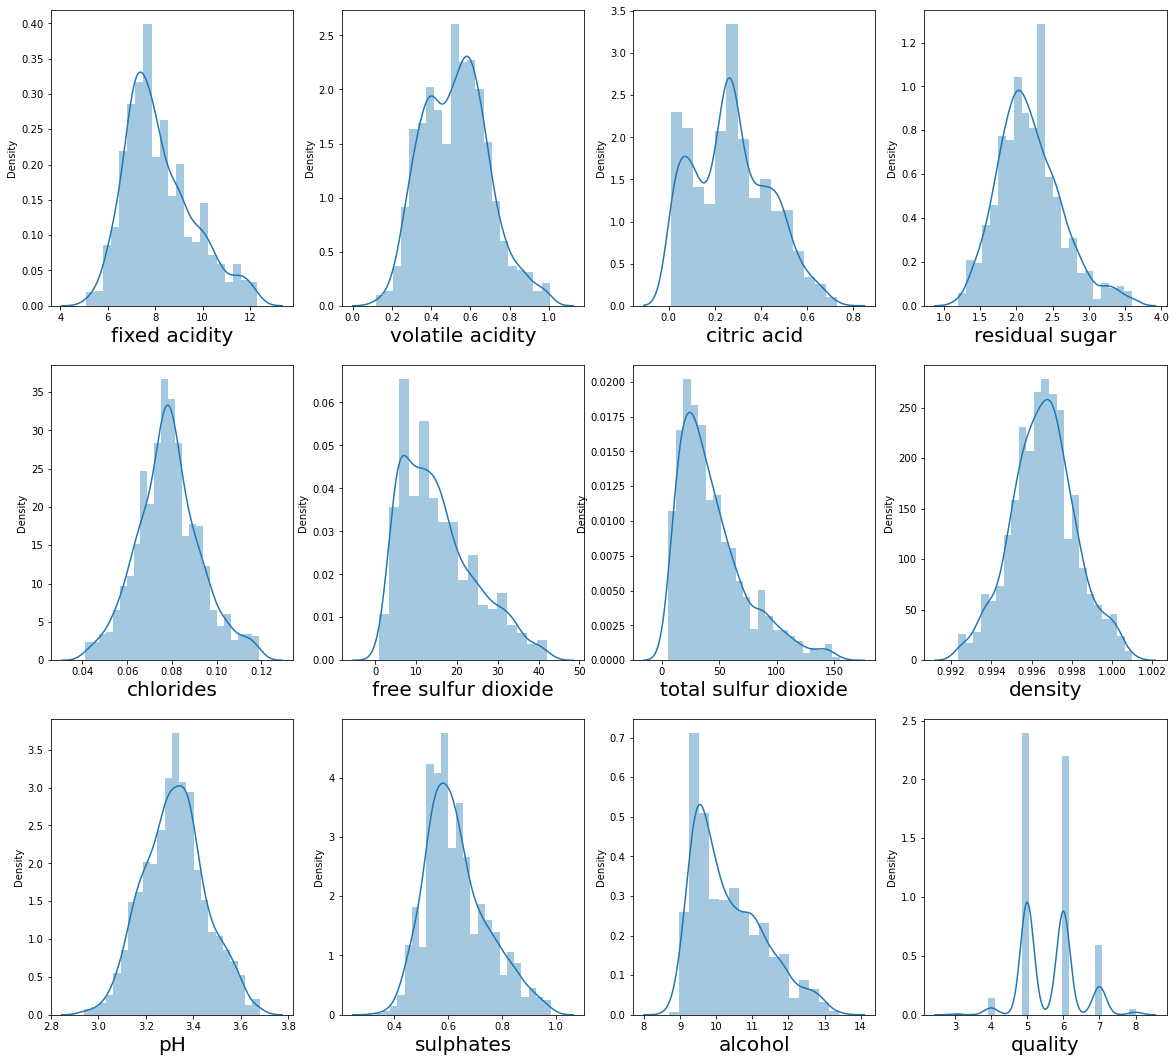

In [71]:
plt.figure(figsize =(20,25))
plotnumber =1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(4,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1

plt.show()

In [72]:
X=data.drop(columns=['quality'])
y=data['quality']

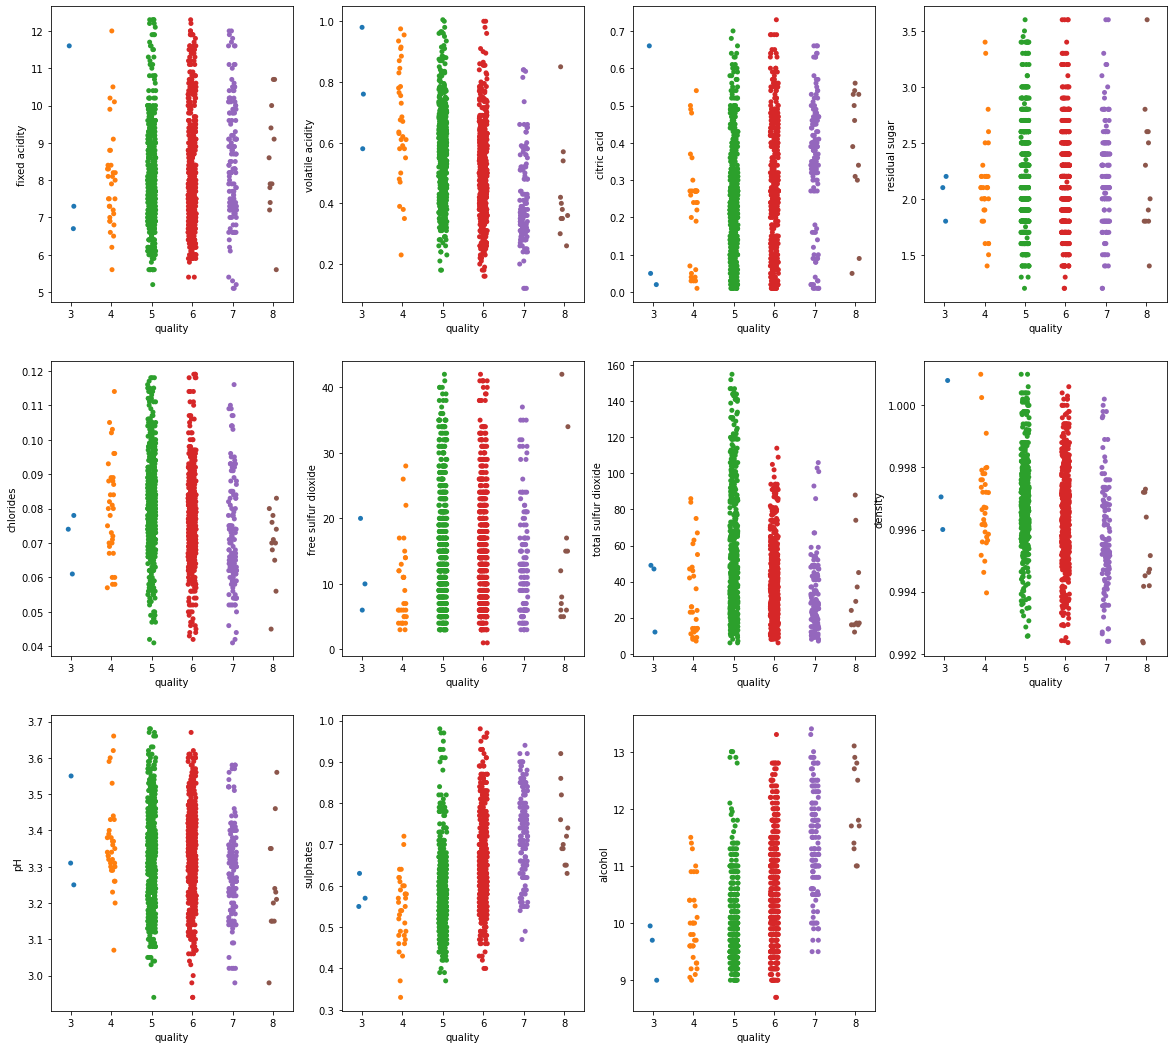

In [73]:
plt.figure(figsize =(20,25))
plotnumber =1

for column in X:
    if plotnumber<=12 :
        ax=plt.subplot(4,4, plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber+=1

plt.show()

In [74]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [75]:
X_scaled.shape[1]

11

In [76]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

vif

,vif,Features
0,6.591541,fixed acidity
1,1.691718,volatile acidity
2,2.341971,citric acid
3,1.688560,residual sugar
4,1.300224,chlorides
5,1.837203,free sulfur dioxide
6,2.047417,total sulfur dioxide
7,6.609206,density
8,3.069187,pH
9,1.334020,sulphates


In [77]:
correlation = data['fixed acidity'].corr(data['density'])

In [78]:
print(correlation)

0.6092483987660668


In [79]:
correlation = data['density']
correlation

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
         ...   
1594    0.99490
1595    0.99512
1596    0.99574
1597    0.99547
1598    0.99549
Name: density, Length: 1222, dtype: float64

In [80]:
correlation = data['fixed acidity']
correlation

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1222, dtype: float64

<AxesSubplot:>

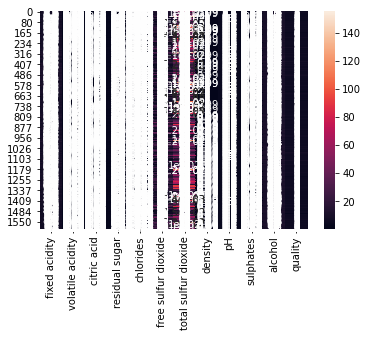

In [81]:
 sns.heatmap(data, annot=True)

In [82]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

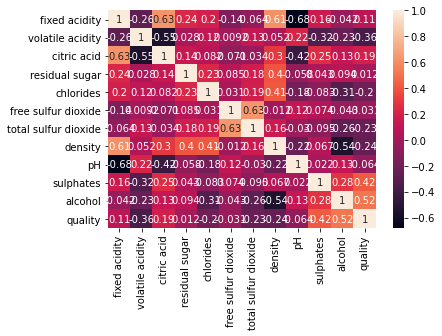

In [83]:
sns.heatmap(data.corr(), annot=True)

In [93]:
data=data.drop(columns=['fixed acidity'])

In [94]:
data

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [101]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [102]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [103]:
y_pred=log_reg.predict(x_test)
y_pred

array([6, 6, 6, 5, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 5, 4, 6, 5, 5, 6, 5, 5, 5, 5, 7,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 6, 5, 6, 6, 7, 5, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 7, 5, 5, 6,
       7, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 6, 6, 6, 5, 5,
       6, 7, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 7, 6, 6, 5, 6,
       5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6,
       7, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6,
       6, 7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5,

In [104]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6013071895424836